#**Indra Imanuel - 20215136** <br>
#**Statistical Learning Homework 1**

In [1]:
# Import the necessary modules
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
# random seed for always same results
tf.random.set_seed(145)

#**Helper Functions**

In [3]:
# Function for plotting the data
def plotData(X, y):
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
  colors = {0:'red', 1:'blue'}
  fig, ax = plt.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

In [4]:
# Function for plotting train loss & accuracy
def plotLossAccuracy(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['accuracy'])
  plt.title('Model Loss & Accuracy')
  plt.ylabel('Loss & Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Loss', 'Accuracy'], loc='upper left')
  plt.show()

#**Generating the Data (Train and Test Data)**

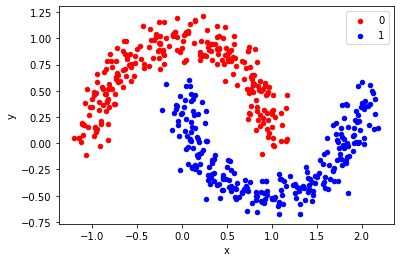

In [5]:
# Generate train data
train_X, train_y = make_moons(n_samples=500, noise=0.1)
plotData(train_X, train_y)

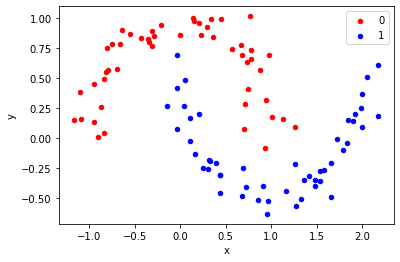

In [6]:
# Generate test data
test_X, test_y = make_moons(n_samples=100, noise=0.1)
plotData(test_X, test_y)

# **Defining the Models using Keras Sequential Module**

In [7]:
# Model 1 - 1 neuron
model1 = Sequential()
model1.add(Dense(units=1, activation='sigmoid', input_dim=2))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model 2 - 2+2+1 neurons
model2 = Sequential()
model2.add(Dense(units=2, activation='relu', input_dim=2))
model2.add(Dense(units=2,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model 3 - 10+10+1 neurons
model3 = Sequential()
model3.add(Dense(units=10, activation='relu', input_dim=2))
model3.add(Dense(units=10,activation='relu'))
model3.add(Dense(units=1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Check Model Summary (The model's layers and number of parameters)
print("Model 1 :")
model1.summary()
print("")

print("Model 2 :")
model2.summary()
print("")

print("Model 3 :")
model3.summary()

Model 1 :
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________

Model 2 :
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Tr

#**Training and Testing the Model**

In [9]:
# Train Model 1
history1 = model1.fit(train_X, train_y, epochs=100, batch_size=4, verbose=2)

Epoch 1/100
125/125 - 0s - loss: 0.9638 - accuracy: 0.2880 - 486ms/epoch - 4ms/step
Epoch 2/100
125/125 - 0s - loss: 0.8984 - accuracy: 0.3260 - 134ms/epoch - 1ms/step
Epoch 3/100
125/125 - 0s - loss: 0.8384 - accuracy: 0.3820 - 148ms/epoch - 1ms/step
Epoch 4/100
125/125 - 0s - loss: 0.7836 - accuracy: 0.4340 - 146ms/epoch - 1ms/step
Epoch 5/100
125/125 - 0s - loss: 0.7340 - accuracy: 0.5220 - 145ms/epoch - 1ms/step
Epoch 6/100
125/125 - 0s - loss: 0.6890 - accuracy: 0.6100 - 146ms/epoch - 1ms/step
Epoch 7/100
125/125 - 0s - loss: 0.6489 - accuracy: 0.6800 - 141ms/epoch - 1ms/step
Epoch 8/100
125/125 - 0s - loss: 0.6129 - accuracy: 0.7300 - 141ms/epoch - 1ms/step
Epoch 9/100
125/125 - 0s - loss: 0.5806 - accuracy: 0.7800 - 138ms/epoch - 1ms/step
Epoch 10/100
125/125 - 0s - loss: 0.5516 - accuracy: 0.8200 - 137ms/epoch - 1ms/step
Epoch 11/100
125/125 - 0s - loss: 0.5258 - accuracy: 0.8400 - 137ms/epoch - 1ms/step
Epoch 12/100
125/125 - 0s - loss: 0.5025 - accuracy: 0.8580 - 133ms/epoch 

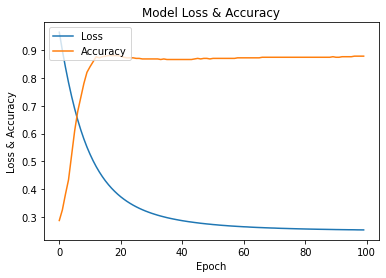

In [10]:
# Plot Model 1 Train Loss & Accuracy
plotLossAccuracy(history1)

25/25 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8600


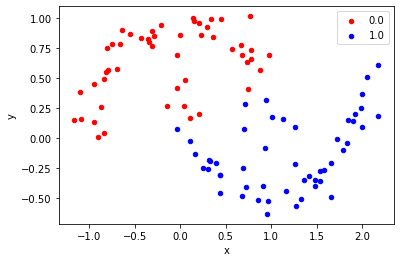

In [11]:
# Test Model 1
score1, acc1 = model1.evaluate(test_X, test_y, batch_size=4)
pred_y = model1.predict(test_X, batch_size=4)
pred_y_round = np.rint(pred_y)
plotData(test_X, pred_y_round[:, 0])

In [12]:
# Train Model 2
history2 = model2.fit(train_X, train_y, epochs=100, batch_size=4, verbose=2)

Epoch 1/100
125/125 - 1s - loss: 0.6689 - accuracy: 0.5000 - 573ms/epoch - 5ms/step
Epoch 2/100
125/125 - 0s - loss: 0.6238 - accuracy: 0.5820 - 154ms/epoch - 1ms/step
Epoch 3/100
125/125 - 0s - loss: 0.6005 - accuracy: 0.6680 - 222ms/epoch - 2ms/step
Epoch 4/100
125/125 - 0s - loss: 0.5849 - accuracy: 0.6800 - 395ms/epoch - 3ms/step
Epoch 5/100
125/125 - 0s - loss: 0.5698 - accuracy: 0.6980 - 200ms/epoch - 2ms/step
Epoch 6/100
125/125 - 0s - loss: 0.5553 - accuracy: 0.7140 - 146ms/epoch - 1ms/step
Epoch 7/100
125/125 - 0s - loss: 0.5409 - accuracy: 0.7240 - 146ms/epoch - 1ms/step
Epoch 8/100
125/125 - 0s - loss: 0.5274 - accuracy: 0.7400 - 310ms/epoch - 2ms/step
Epoch 9/100
125/125 - 0s - loss: 0.5130 - accuracy: 0.7440 - 439ms/epoch - 4ms/step
Epoch 10/100
125/125 - 0s - loss: 0.4994 - accuracy: 0.7600 - 225ms/epoch - 2ms/step
Epoch 11/100
125/125 - 0s - loss: 0.4867 - accuracy: 0.7700 - 209ms/epoch - 2ms/step
Epoch 12/100
125/125 - 1s - loss: 0.4737 - accuracy: 0.7780 - 892ms/epoch 

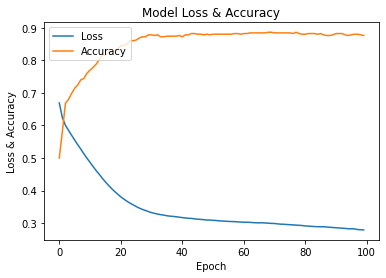

In [13]:
# Plot Model 2 Train Loss & Accuracy
plotLossAccuracy(history2)

25/25 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8700


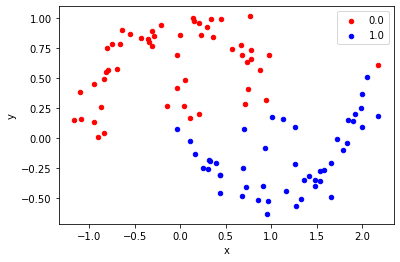

In [14]:
# Test Model 2
score2, acc2 = model2.evaluate(test_X, test_y, batch_size=4)
pred_y_2 = model2.predict(test_X, batch_size=4)
pred_y_2_round = np.rint(pred_y_2)
plotData(test_X, pred_y_2_round[:, 0])

In [15]:
# Train Model 3
history3 = model3.fit(train_X, train_y, epochs=100, batch_size=4, verbose=2)

Epoch 1/100
125/125 - 1s - loss: 0.6040 - accuracy: 0.6580 - 519ms/epoch - 4ms/step
Epoch 2/100
125/125 - 0s - loss: 0.4677 - accuracy: 0.8140 - 163ms/epoch - 1ms/step
Epoch 3/100
125/125 - 0s - loss: 0.3772 - accuracy: 0.8260 - 170ms/epoch - 1ms/step
Epoch 4/100
125/125 - 0s - loss: 0.3273 - accuracy: 0.8460 - 171ms/epoch - 1ms/step
Epoch 5/100
125/125 - 0s - loss: 0.2990 - accuracy: 0.8600 - 165ms/epoch - 1ms/step
Epoch 6/100
125/125 - 0s - loss: 0.2781 - accuracy: 0.8700 - 157ms/epoch - 1ms/step
Epoch 7/100
125/125 - 0s - loss: 0.2653 - accuracy: 0.8680 - 172ms/epoch - 1ms/step
Epoch 8/100
125/125 - 0s - loss: 0.2547 - accuracy: 0.8760 - 168ms/epoch - 1ms/step
Epoch 9/100
125/125 - 0s - loss: 0.2459 - accuracy: 0.8820 - 155ms/epoch - 1ms/step
Epoch 10/100
125/125 - 0s - loss: 0.2411 - accuracy: 0.8820 - 172ms/epoch - 1ms/step
Epoch 11/100
125/125 - 0s - loss: 0.2361 - accuracy: 0.8860 - 155ms/epoch - 1ms/step
Epoch 12/100
125/125 - 0s - loss: 0.2322 - accuracy: 0.8880 - 155ms/epoch 

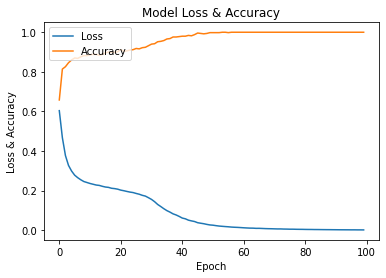

In [16]:
# Plot Model 3 Train Loss & Accuracy
plotLossAccuracy(history3)

25/25 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9900


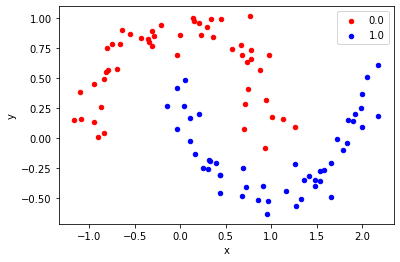

In [17]:
# Test Model 3
score3, acc3 = model3.evaluate(test_X, test_y, batch_size=4)
pred_y_3 = model3.predict(test_X, batch_size=4)
pred_y_3_round = np.rint(pred_y_3)
plotData(test_X, pred_y_3_round[:, 0])